# Discharged Gas Tracking
This notebook was originated from the question that arose from Leo's analysis on discharged gas analysis. The radial distance distribution showed some final placement difference b/w SN-heated gas and non SN-heated gas . Although the majority of SN-heated gas ended up being closer to satellite center, this might indicate that they just started expelling from inner circle rather than outer ring in the satellite halo. To understand the true behavior of discharged gas particle, here I conduct tracking and some further analysis on SN-heated discharged gas particles. Codewise, this analysis situates itself on the intersection of particle tracking code from Hollis' and stellar feedback analysis code from Leo's.

In [10]:
#importing everything
import pynbody
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from analysis import * 
from compiler import *
from dischargedgastracking import *

In [11]:
#load the data
key = 'h329_7'
sim = str(key[:4])
haloid = int(key[5:])

data = processing(filenames['h329'], sim, haloid)

Running for simulation /home/watanabe/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/snapshots_200crit_h329/h329.cosmo50PLK.3072gst5HbwK1BH.004096 
Loaded simulation
> Returning h329_7 outputs <


In [20]:
data.keys()

dict_keys(['haloid', 'Rvir', 'Xc', 'Yc', 'Zc', 'Msat', 'conct', 'Rs', 'rho0'])

## Energy distribution

In [3]:
path = f'{rootPath}SNe-heated_Gas_Flow/SNeData/discharged_particles.hdf5'
discharged = pd.read_hdf(path, key=key)
discharged.keys()

Index(['time', 'pid', 'rho', 'temp', 'mass', 'coolontime', 'r', 'r_per_Rvir',
       'x', 'y', 'z', 'satRvir', 'a', 'vx', 'vy', 'vz', 'v', 'r_rel_host',
       'r_rel_host_per_Rvir', 'x_rel_host', 'y_rel_host', 'z_rel_host',
       'hostRvir', 'vx_rel_host', 'vy_rel_host', 'vz_rel_host', 'v_rel_host',
       'sat_Xc', 'sat_Yc', 'sat_Zc', 'sat_vx', 'sat_vy', 'sat_vz', 'host_Xc',
       'host_Yc', 'host_Zc', 'host_vx', 'host_vy', 'host_vz', 'sat_Mstar',
       'sat_Mgas', 'host_Mstar', 'host_Mgas', 'sat_r_half', 'sat_r_gas',
       'host_r_half', 'host_r_gas', 'in_sat', 'in_host', 'in_other_sat',
       'in_IGM', 'dt', 'r_gal', 'host_r_gal', 'sat_disk', 'sat_halo',
       'host_disk', 'host_halo', 'other_sat', 'IGM', 'sat_Mvir', 'angle',
       'snHeated'],
      dtype='object')

In [4]:
halo_info = read_timesteps('h148')

In [23]:
filenames = {'h148': '/home/watanabe/Sims/h148.cosmo50PLK.3072g/h148.cosmo50PLK.3072g3HbwK1BH/snapshots_200crit_h148/h148.cosmo50PLK.3072g3HbwK1BH.004096',
            'h229': '/home/watanabe/Sims/h229.cosmo50PLK.3072g/h229.cosmo50PLK.3072gst5HbwK1BH/snapshots_200crit_h229/h229.cosmo50PLK.3072gst5HbwK1BH.004096',
            'h242': '/home/watanabe/Sims/h242.cosmo50PLK.3072g/h242.cosmo50PLK.3072gst5HbwK1BH/snapshots_200crit_h242/h242.cosmo50PLK.3072gst5HbwK1BH.004096',
            'h329': '/home/watanabe/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/snapshots_200crit_h329/h329.cosmo50PLK.3072gst5HbwK1BH.004096'}

s = pynbody.load(filenames['h148'])
s.physical_units()
h = s.halos(dummy=True)

In [27]:
time_arr = halo_info['t'].unique()
for time in time_arr[0:1]:
    timestep = time*4096/13.8
    s = pynbody.load(filenames['h148'])
    s.physical_units()
    h = s.halos(dummy=True)
    
    z0haloid_arr = halo_info[np.isclose(halo_info['t'],time,atol = 0.001)]['z0haloid']
    haloid_arr = halo_info[np.isclose(halo_info['t'],time,atol = 0.001)]['haloid']
    for z0haloid, haloid in zip(z0haloid,haloid):
        Msat = h[haloid].properties['mass']*(1.98847*10**30) # satellite mass in units of kg
        Rvir = (h[haloid].properties['Rvir']/s.properties['h'])*(3.08568*10**19) # Virial Radius and center coordinates, in units of m
        conct = h[haloid].properties['cNFW'] # concentration parameter
        Rs = Rvir/conct # scale radius
        rho0 = (Msat/(4*np.pi*Rs**3))*(1/(np.log(1+conct)-conct/(1+conct))) #density 0
        print(z0haloid, rho0)

2 2.389820167028277e-21
3 1.2998020261515772e-21
4 1.270397625460065e-22
6 1.931704706056702e-21
7 1.7787913169299027e-22
11 3.097729887655079e-22
10 7.220586414164286e-21
12 5.660244955254978e-22
13 3.402788880763918e-22
15 1.9164730945273947e-23
20 3.2908339323405416e-21
23 1.327167948502045e-22
27 3.76821223018098e-22
29 1.6271130127734284e-21
28 2.1486245651762958e-21
33 1.333819292423422e-22
34 1.3953972905741882e-22
37 2.8901290464469458e-22
38 4.402857734645096e-22
43 1.802611201337437e-22
41 1.5831962677589012e-21
51 2.7050768327301358e-21
52 4.423711806542713e-22
59 2.1301511119215514e-22
55 2.4840432107686246e-22
65 8.988004417513731e-22
75 1.7512873840481424e-22
86 6.889671240681732e-22
94 2.3006183254161357e-22
109 7.124236375819017e-23
128 6.508509503321258e-22
114 5.466344871253034e-22
122 3.3766248471315904e-22
148 3.718830576747949e-22
188 2.400167376797749e-21
230 5.803884952793572e-21
251 1.9491161952309342e-21
249 1.1938119857925621e-22
282 2.5066235745964964e-22
327

In [13]:
np.mean(discharged['v'])

22.94330362352432

In [4]:
import math
#filtering discharged particles so that only last snapshot data is considered
np.sort(np.unique(discharged['time'])) #*4096/13.8

array([11.6458956 , 11.96913088, 12.15095073, 12.29236617, 12.61560145,
       12.93883674, 13.26207202, 13.58530731, 13.8007975 ])

We have 521 discharged particles at the final snapshot. Since its easy, let's consider those energy distribution.

In [13]:
data['Rvir']

1.0030707440504607e+18

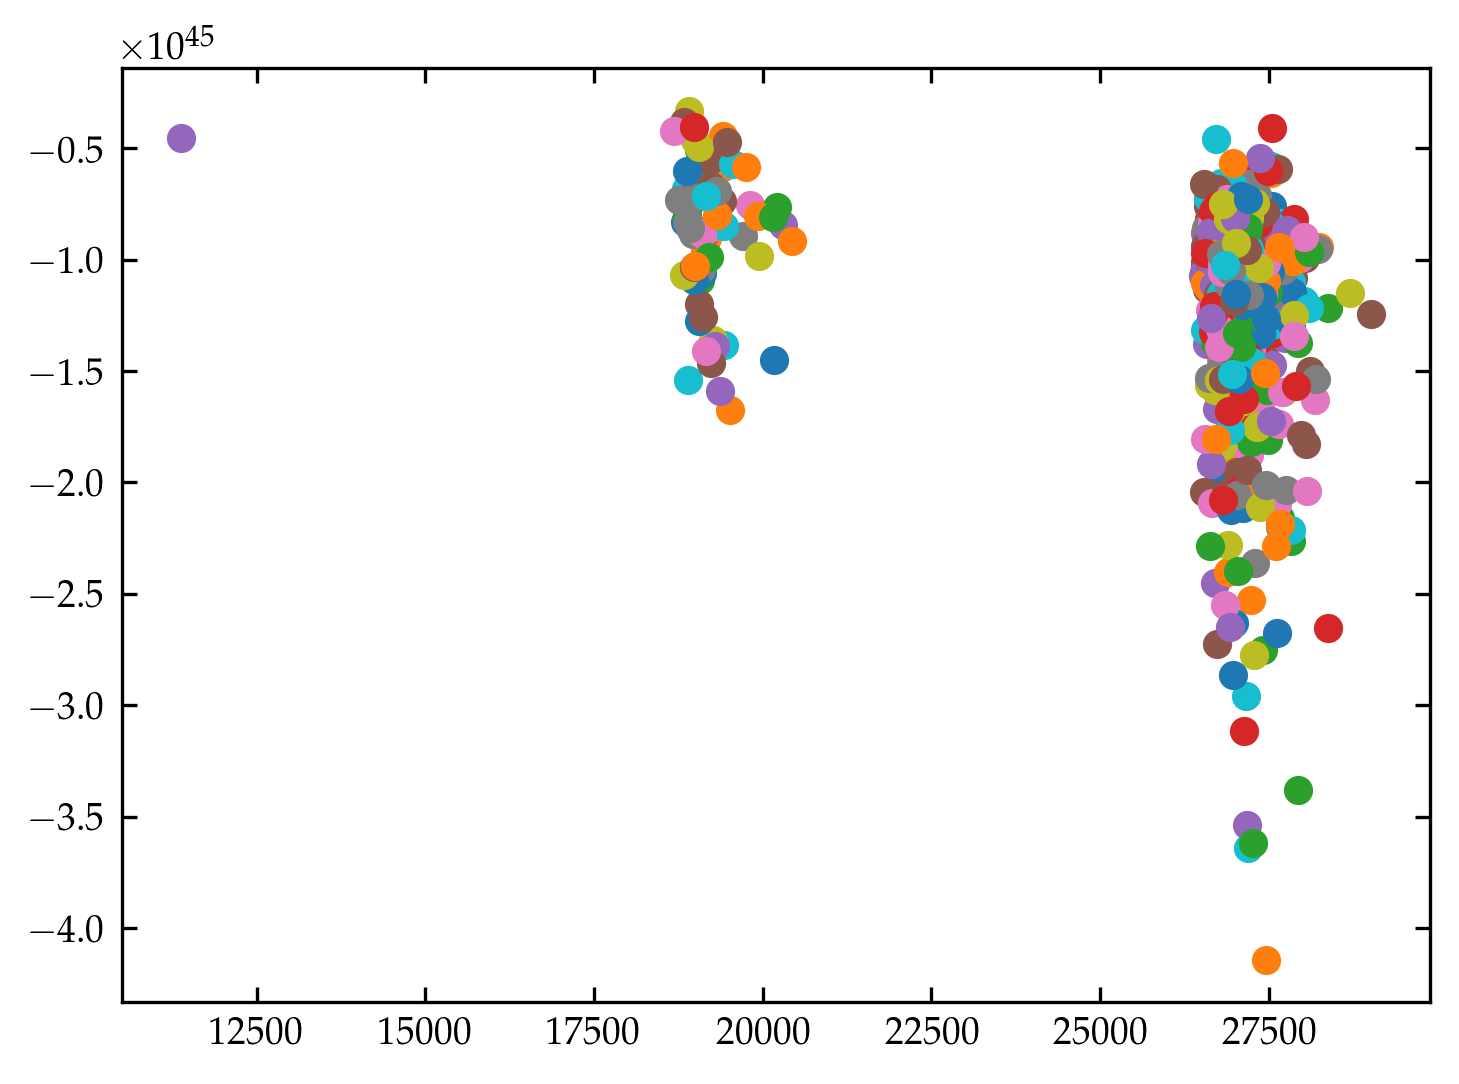

In [14]:
pids = np.unique(discharged['pid'])

fig, ax = plt.subplots(1, 1, dpi=300, figsize=(4.75,3.5), constrained_layout=True)

Etotal_arr = np.array([])
E_snheated = np.array([])
E_nonheated = np.array([])
K_arr = np.array([])
U_arr = np.array([])
#iterate thru unique gas particles discharged
for pid in pids:
    dat = discharged[discharged['pid'] == pid] #filter the unique particle
    
    if math.isclose(dat['time'].max(), 13.8007975, abs_tol=1e-6): #is the timestep close to our snapshot
        #filter the last step of the particle
        final = dat[dat['time'] == (dat['time'].max())]
            
        Rmax = (final['r'])*(3.08568*10**19) #in units of km
        #print(Rmax)
        vel = final['v']/1000 #in units of m/s
        #print(vel)
        
#         #save in DataFrame
#         output['pid'] = pid
#         output['mass'] = final['mass']*(1.98847*10**30) # particle mass in units of kg
#         output['Rmax'] = Rmax
#         output['vel'] = vel
        
        Rmax_none = False
        
    else:
        Rmax_none = True

    #just to confirm that we are looking at the same snapshot
    #it turns out that there was some variation, like 1.128886750427118 and 1.0980625381421738
    #and 1.0030707440143406e+21, which is of our interest
    #and so we take the lowest in this case
    satRvir = data['Rvir'] #in units of m
    #print(satRvir)

    #skip this particle if Rmax was not defined
    if Rmax_none:
        continue
    
    # mass enclosed, in units of physical units
    Menc = 4*np.pi*data['rho0']*data['Rs']**3*(np.log((data['Rs']+Rmax)/data['Rs'])-
                                                   Rmax/(data['Rs']+Rmax))

    #print(Menc)
    
    # total energy at discharging event
    Etotal = (-G*Menc/Rmax + 1/2*vel**2)*final.mass*(1.98847*10**30)
    K = 1/2*vel**2*final.mass*(1.98847*10**30)
    U = (-G*Menc/Rmax)*final.mass*(1.98847*10**30)
    #print(Etotal)
    
    #plot anyway
    ax.scatter(final['mass'], Etotal)
    
    #save in an array, based on SN_heating history
    Etot = np.asarray(Etotal)
    Utot = np.asarray(U)
    Ktot = np.asarray(K)
    
    if final['snHeated'].all():
        E_snheated = np.append(E_snheated, Etot)
    else:
        E_nonheated = np.append(E_nonheated, Etot)

    Etotal_arr = np.append(Etotal_arr, Etot)
    K_arr = np.append(K_arr, Ktot)
    U_arr = np.append(U_arr, Utot)

In [9]:
data['Msat']

6.9120609129e+39

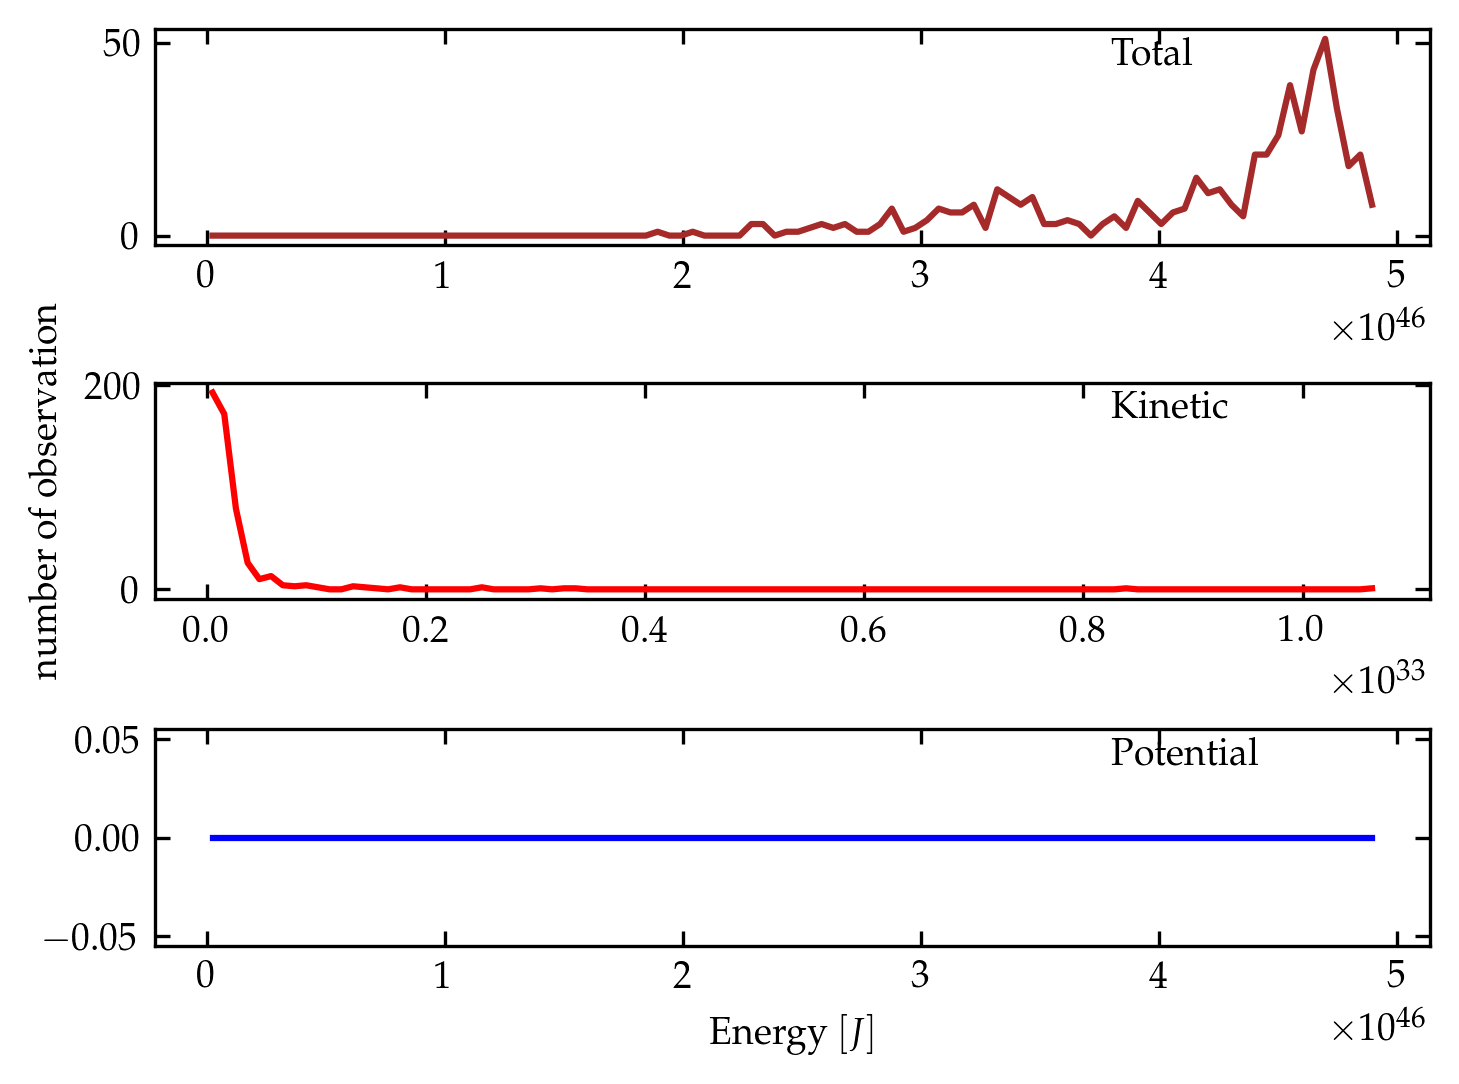

In [7]:
#plot the histogram of energy distribution
bins = 100
rangemaxE = np.max(abs(Etotal_arr))
rangemaxU = np.max(abs(U_arr))
rangemaxK = np.max(abs(K_arr))


# for all discharged gas
#total energy
y, x = np.histogram(abs(Etotal_arr), bins=bins, range=(0,rangemaxE))
# only kinetic
y1, x1 = np.histogram(abs(K_arr), bins=bins, range=(0,rangemaxK))
#only potential
y2, x2 = np.histogram(U_arr, bins=bins, range=(0,rangemaxU))

fig, axes = plt.subplots(3, 1, dpi=300, figsize=(4.75,3.5), constrained_layout=True)

bincenters = 0.5*(x[1:] + x[:-1])
axes[0].plot(bincenters, y, label='total', c='brown')
axes[0].annotate('Total', (0.75, 0.96), xycoords='axes fraction', va='top', zorder=1000)

bincenters1 = 0.5*(x1[1:] + x1[:-1])
axes[1].plot(bincenters1, y1, label='Kinetic', c='Red')
axes[1].annotate('Kinetic', (0.75, 0.96), xycoords='axes fraction', va='top', zorder=1000)

bincenters2 = 0.5*(x2[1:] + x2[:-1])
axes[2].plot(bincenters2, y2, label='Potential', c='Blue')
axes[2].annotate('Potential', (0.75, 0.96), xycoords='axes fraction', va='top', zorder=1000)

axes[2].set_xlabel(r'Energy $[J]$')
axes[1].set_ylabel('number of observation')

#ax.tick_params(direction='in',which='both',top=True)
plt.savefig(f'plots/energy_distribution.pdf')

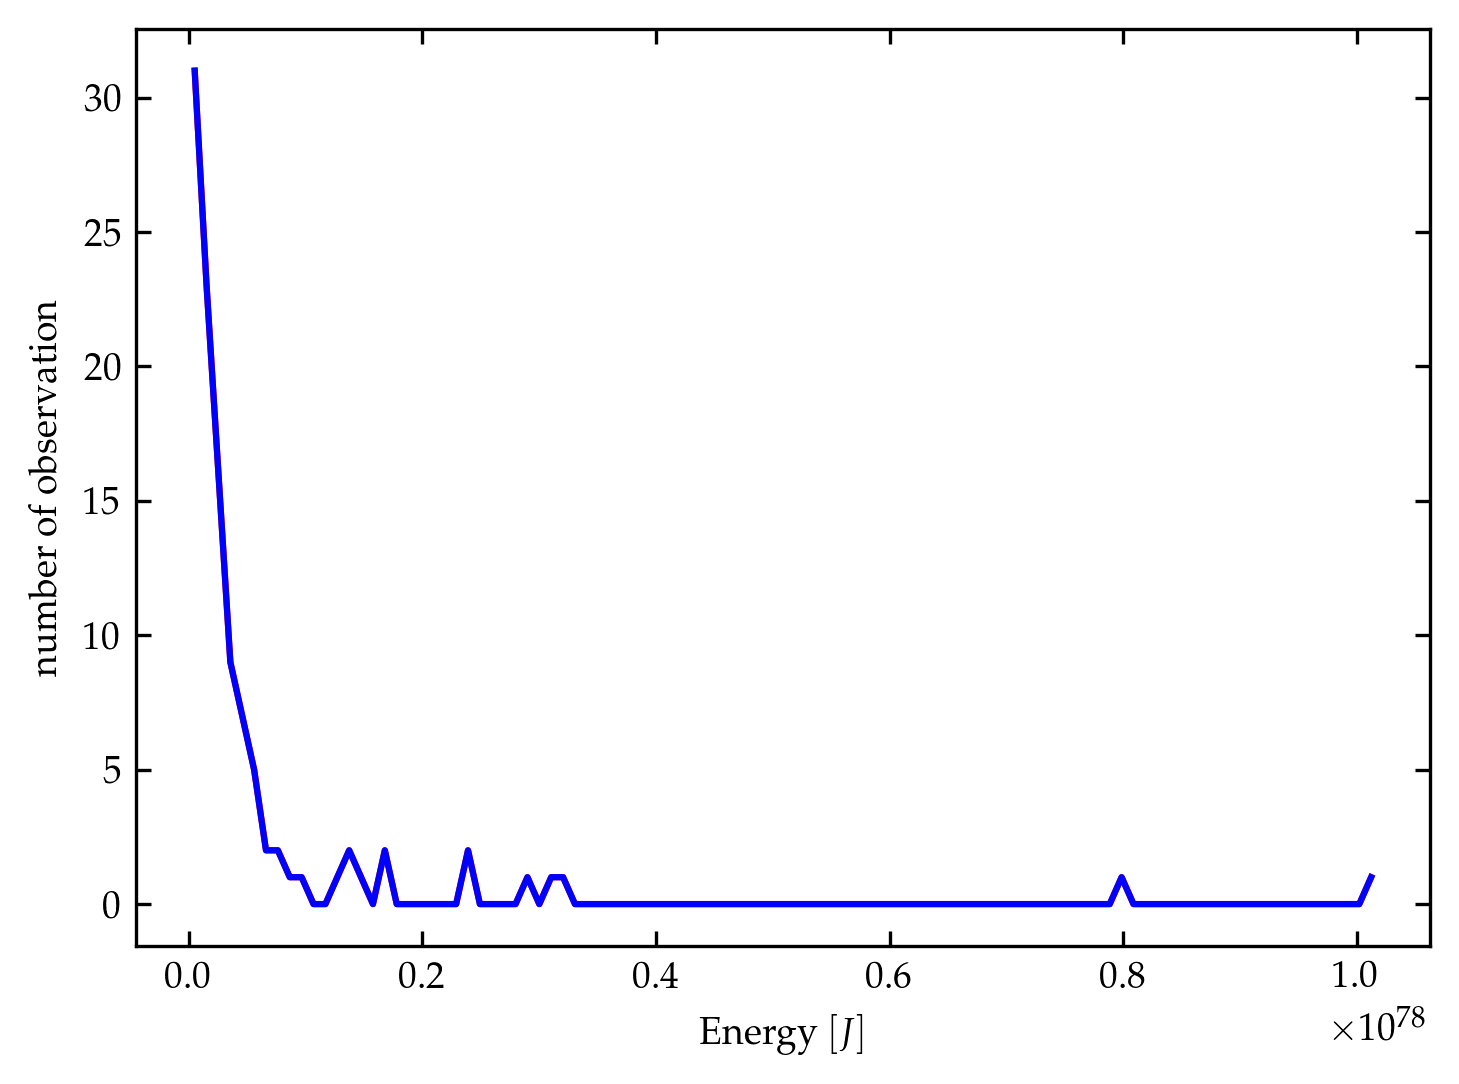

In [66]:
fig, ax = plt.subplots(1, 1, dpi=300, figsize=(4.75,3.5), constrained_layout=True)

ax.plot(bincenters1, y1, label='SN-heated', c='Red')
ax.plot(bincenters2, y2, label='non SN-heated', c='Blue')
ax.set_xlabel(r'Energy $[J]$')
ax.set_ylabel('number of observation')

#ax.tick_params(direction='in',which='both',top=True)
plt.savefig(f'plots/energy_distribution_SN.pdf')